In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
# perform exploratory analysis here:
#sns.pairplot(df, corner = True)

0.7583056198842679
0.7448099111413132


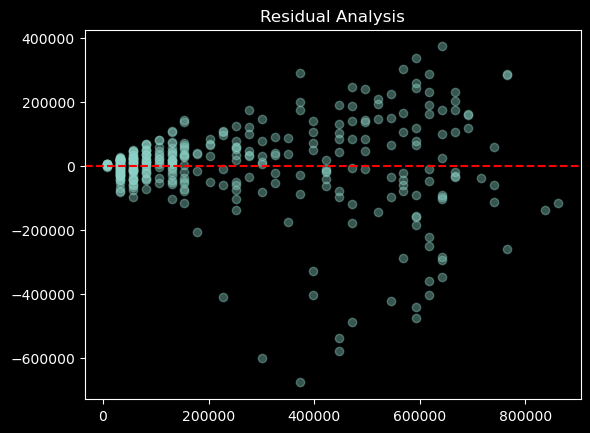

In [10]:
## perform single feature linear regressions here:
# Ranking and Winnings

x = np.array(df['Losses']).reshape(-1,1)
y = df['Winnings']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
model=mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.show()

0.8579942559755236
0.8376507612151084


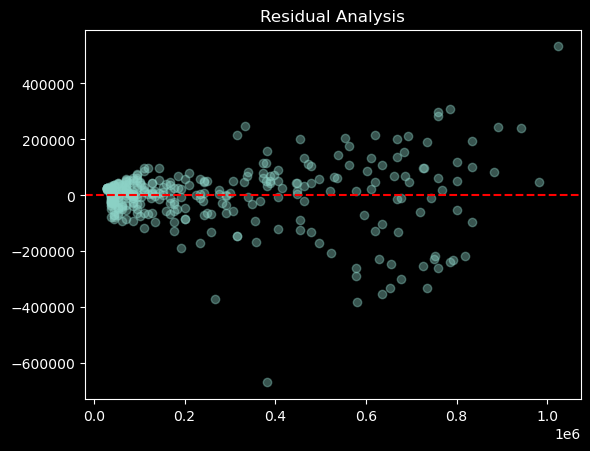

In [5]:
## perform two feature linear regressions here:
x = df[['Losses', 'Wins']]
y = df['Winnings']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
model=mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

0.874098703538216
0.8500448932245994


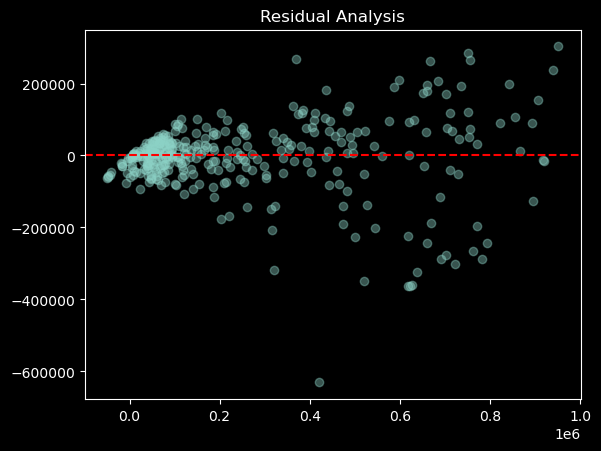

In [9]:
## perform multiple feature linear regressions here:
x = df[['Losses', 'Wins', 'Ranking', 'Aces', 'DoubleFaults', 'FirstServePointsWon']]
y = df['Winnings']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()
model=mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

residuals = y_predict - y_test

plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.show()